**Name** - Sakshee Phade<br>
**Roll No** - 43244<br>
**Batch** - R10<br>
**Problem** **Statement** - Implement SVM for performing classification and find its accuracy on the given data. (Using
Python)

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [7]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataset.shape

In [13]:
x = dataset.iloc[:, [2,3]].values ##data features
y = dataset.iloc[:, 4].values ##target, 0 : not purchased, 1: purchased
print(x)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [33]:
#splitting the data into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0) #20% data for testing, 75% for training

In [34]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [45]:
print("Train : ", x_train.shape)
print("Test : ", x_test.shape)
print(x_test)

Train :  (320, 2)
Test :  (80, 2)
[[-0.49618606  0.56021375]
 [ 0.2389044  -0.59133674]
 [-0.03675452  0.18673792]
 [-0.49618606  0.31122986]
 [-0.03675452 -0.59133674]
 [-0.77184498 -1.52502632]
 [-0.40429975 -1.68064126]
 [ 0.05513178  2.33422397]
 [-1.59882175 -0.03112299]
 [ 1.06588117 -0.80919764]
 [-0.49618606 -0.62245972]
 [-0.67995868 -0.43572181]
 [ 0.14701809 -0.43572181]
 [ 0.33079071  0.24898389]
 [-1.41504914  0.52909077]
 [-0.31241345  1.49390334]
 [ 0.14701809  0.24898389]
 [-1.50693545  0.49796778]
 [ 1.80097163  1.89850216]
 [-0.03675452 -1.46278035]
 [-0.03675452 -0.6847057 ]
 [ 1.06588117  2.33422397]
 [ 0.51456332 -0.56021375]
 [ 1.06588117  1.1204275 ]
 [-1.13939022 -1.27604243]
 [ 1.24965379  2.24085501]
 [-0.67995868  0.56021375]
 [-0.58807237  0.34235285]
 [ 0.14701809 -0.2178609 ]
 [-0.31241345  0.52909077]
 [-1.32316283  0.59133674]
 [ 0.14701809  0.31122986]
 [ 1.98474425 -0.28010688]
 [ 0.14701809 -0.49796778]
 [-1.04750391 -0.34235285]
 [-1.59882175 -0.5290

In [36]:
#Support Vector Classifier Linear Model
from sklearn.svm import SVC
classifier = SVC(kernel = "linear")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

tuples = list(zip(y_test, y_pred))
compare_df = pd.DataFrame(tuples, columns=['y_test', 'y_pred'])
print(compare_df)

    y_test  y_pred
0        0       0
1        0       0
2        0       0
3        0       0
4        0       0
..     ...     ...
75       0       0
76       0       1
77       0       0
78       1       1
79       1       1

[80 rows x 2 columns]


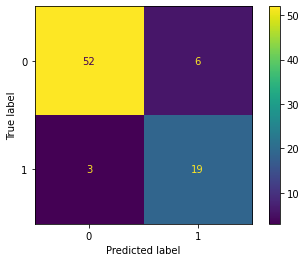

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)

In [40]:
#printing accuracy
from sklearn import metrics
print("Accuracy Linear Kernel: ", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy Linear Kernel:  0.8875
Precision: 0.76
Recall: 0.8636363636363636


In [24]:
#Support Vector Classifier RBF Model
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0, gamma=0.1, C=0.02)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn import metrics
print("Accuracy RBF Kernel: ", metrics.accuracy_score(y_test, y_pred))

Accuracy RBF Kernel:  0.68


In [42]:
#Support Vector Classifier Poly Model
from sklearn.svm import SVC
classifier = SVC(kernel = "poly", random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn import metrics
print("Accuracy Poly Kernel: ", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy Poly Kernel:  0.9
Precision: 0.85
Recall: 0.7727272727272727


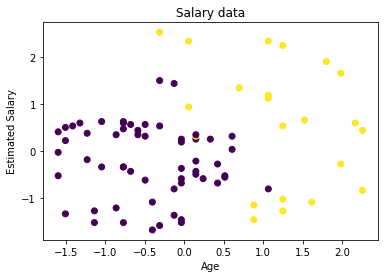

In [44]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Salary data")
plt.show()

[[1.58716679 0.97838796]]


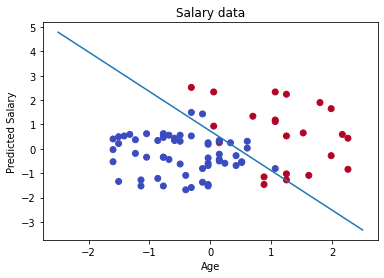

In [48]:
#Support Vector Classifier Linear Model
from sklearn.svm import SVC
classifier = SVC(kernel = "linear")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classifier.coef_)

# x2 = -w1/w2 x1 - b/w2

plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test, cmap = plt.cm.coolwarm)
w = classifier.coef_[0]
w1 = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5) # x axis after scaling ages are btwn 2.5
yy = w1 * xx - (classifier.intercept_[0]) / w[1] # y = mx + c 

plt.xlabel("Age")
plt.ylabel("Predicted Salary")
plt.title("Salary data")
plt.plot(xx, yy)
plt.show()